IMPORTING LIBRARIES

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
df = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [78]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


FINDING IF THERE ARE NULL VALUES

In [79]:
df.isnull().sum()

id       0
text     0
genre    0
dtype: int64

FINDING TARGET VALUES

In [80]:
df['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

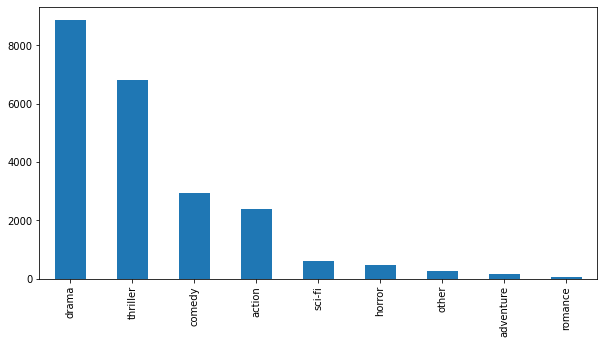

In [2]:
#plot df['genre]
plt.figure(figsize=(10,5))
df['genre'].value_counts().plot(kind='bar')

In [81]:
genre_encode = {'thriller':0, 'comedy':1, 'drama':2, 'action':3 , 'sci-fi':4, 'other':5,'romance':6, 'horror':7, 'adventure':8}
 
 

In [82]:
df['genre'] = df['genre'].map(genre_encode)

In [83]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",0
1,2,"t, summa cum laude and all. And I'm about to l...",1
2,3,"up Come, I have a surprise.... She takes him ...",2
3,4,ded by the two detectives. INT. JEFF'S APARTME...,0
4,5,"nd dismounts, just as the other children reach...",2


IMPORTING NLTK LIBRARIES

In [84]:
import re 
import nltk

In [85]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [87]:
corpus = list()


PRE PROCESSING ALL PLOTS IN THE PARAGRAPH

In [88]:
for i in range(0, df.shape[0]):
    text = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = df['text'][i])
    text = text.lower()
    words = text.split()
    cleaned_words = [word for word in words if word not in set(stopwords.words('english'))]
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in cleaned_words]
    text = ' '.join(stemmed_words)
    corpus.append(text)

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 15000, ngram_range = (1,3))
x = cv.fit_transform(corpus).toarray()
y = df['genre'].values

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [91]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [92]:
y_pred = classifier.predict(x_test)

FINDING CORRELATION MATRIX

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1218   12   72    7    6    0    0    3    0]
 [  15  513   23    7    1    0    0    0    0]
 [  88   22 1688   19    2    1    3    3    1]
 [   9    6    9  452    0    0    0    0    0]
 [   7    1    7    2  115    0    0    0    0]
 [   1    0    0    1    0   64    0    0    0]
 [   0    0    0    0    0    0   11    0    0]
 [   5    1    8    1    0    0    0   67    0]
 [   1    0    4    1    0    0    0    0   39]]


<AxesSubplot:>

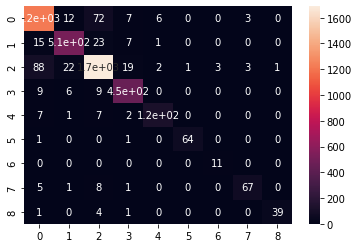

In [94]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9227192205491586

In [96]:
import pickle


In [97]:
pickle.dump(cv, open('cv.pkl', 'wb'))

In [98]:
pickle.dump(classifier, open('project.pkl', 'wb'))